In [1]:
import pandas as pd

data=pd.read_csv('insurance.csv')
data.head()
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df=data.copy()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
from sklearn.model_selection import train_test_split
X=df.drop('charges',axis='columns')
# print(X)
y=df['charges']
# print(y)   

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error is: ",mse)
print(r2)

Mean Squared Error is:  33635210.43117841
0.7833463107364538


In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
model1=RandomForestRegressor(random_state=42)
model1.fit(X_train,y_train)
# model.score(X_test,y_test)
y_pred=model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 21073365.415079337
R² Score: 0.8642606273649586


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
model2=GradientBoostingRegressor(random_state=42)
model2.fit(X_train,y_train)
# model.score(X_test,y_test)
y_pred=model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 18944595.15596614
R² Score: 0.8779726251291786


In [23]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,r2_score
model3=lgb.LGBMRegressor(random_state=42)
model3.fit(X_train,y_train)
# model.score(X_test,y_test)
y_pred=model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 20667094.37938923
R² Score: 0.8668775314245685


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred=model2.predict(X_test)
age=int(input("Enter age: "))
sex=int(input("Enter sex:"))
bmi=float(input("Enter bmi: "))
children=int(input("Enter children: "))
smoker=int(input("Enter smoker: "))
region=int(input("Enter region: "))

prediction=model.predict([[age,sex,bmi,children,smoker,region]])
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error is: ",mse)
print("The insurance cost is: ",prediction[0])

Mean Squared Error is:  18944595.15596614
The insurance cost is:  17778.943597381553


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  


In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print(clusters)

[1 2 2 ... 1 1 1]


c:\Users\2024\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [29]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
print(gmm_labels)


[1 2 2 ... 1 1 1]


c:\Users\2024\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


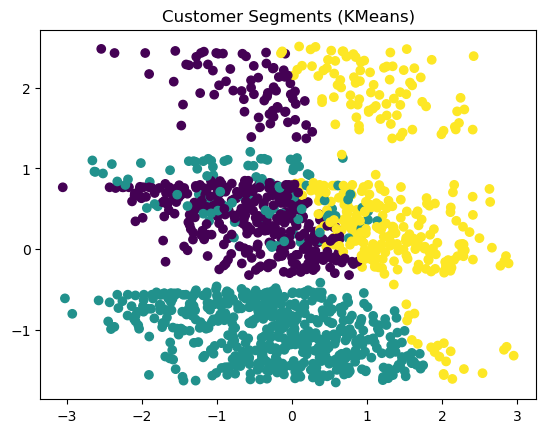

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segments (KMeans)")
plt.show()
